## Objective
* The objective of this exercise is to explore and visualize the Traffic Index dataset to gain insights and understand the patterns in the data.

##Dataset Description

| Column Name | Description | Data Type |
| :---------------- | :------: | ----: |
|   City  |   Name of the city	   | Object |
| Datetime           |   Date and time of the data entry	   | Object |
|  TrafficIndexLive    |  Real-time traffic index	   | Int |
|  Jamscount |  Number of traffic jams	   | Int |
|   JamsDelay  |   Total delay caused by traffic jams (in minutes)	   | Float |
|JamsLength           |   Total length of traffic jams (in kilometers)	   | Float |
|  TrafficIndexWeekAgo    |  Traffic index one week ago	   | Int |
|  TravelTimeHistoric |  Historical average travel time (in minutes)	   | Float |
|   TravelTimeLive  |   Real-time travel time (in minutes)	   | Float |


# Tasks

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Task2week1.csv')
df.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246


## 1. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [5]:
df.describe()

,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
count,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000,62772.000000,62772.000000
mean,14.043113,74.278531,288.353877,49.316135,13.981737,70.706601,70.048451
std,13.488906,107.452022,470.013224,85.352525,13.454922,10.588384,11.966725
min,0.000000,0.000000,0.000000,0.000000,0.000000,49.381346,46.723235
25%,3.000000,9.000000,27.700000,3.000000,3.000000,63.142591,60.712805
50%,10.000000,29.000000,95.700000,12.200000,10.000000,68.894790,68.247303
75%,21.000000,95.000000,336.600000,53.500000,21.000000,76.250975,77.043739
max,138.000000,1359.000000,9989.400000,1173.900000,138.000000,120.140593,134.484139


### Identify and analyze patterns in the data.

In [8]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

df['Hour'] = df['Datetime'].dt.hour
df['Weekday'] = df['Datetime'].dt.weekday

num_col = df.select_dtypes(include=['number'])
num_col

hour = num_col.groupby(df['Hour']).mean()
weekday = num_col.groupby(df['Weekday']).mean()



### Visualize the distribution of key variables (e.g., Traffic_Index, Date).

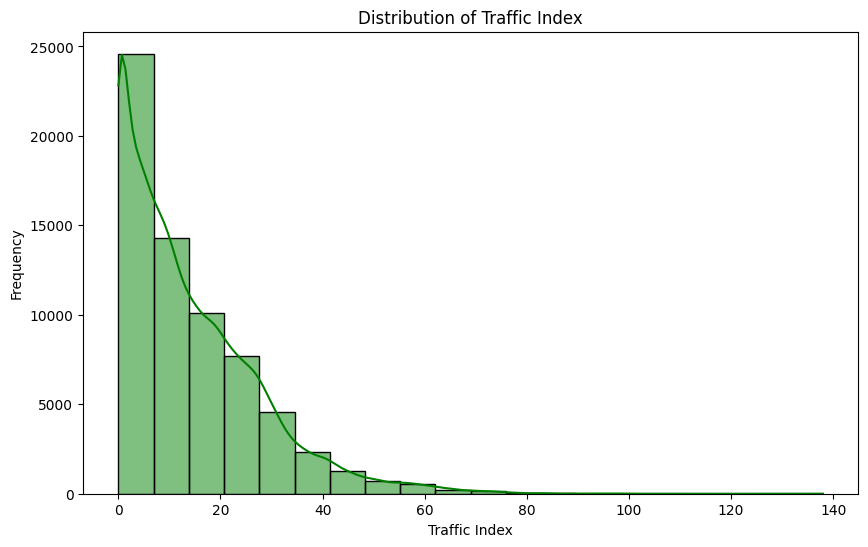

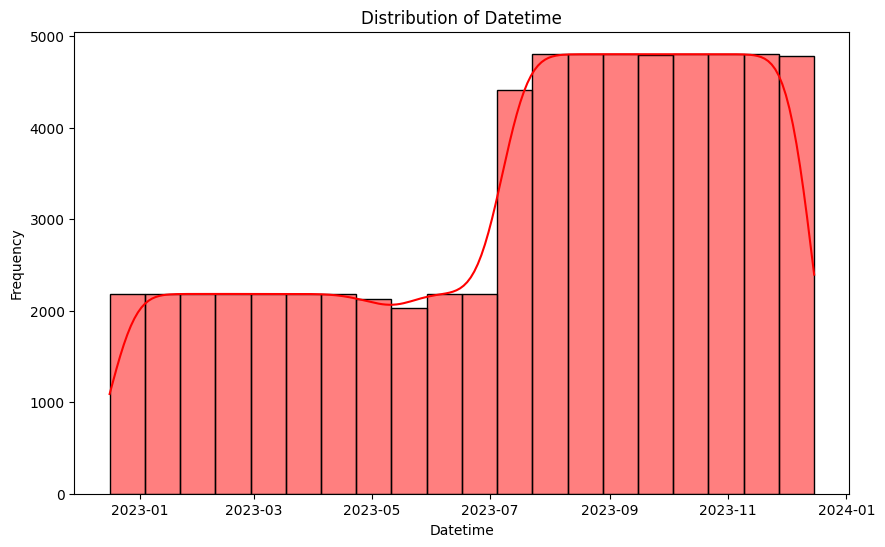

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TrafficIndexLive'], bins=20, kde=True , color='green')
plt.title('Distribution of Traffic Index')
plt.xlabel('Traffic Index')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Datetime'], bins=20, kde=True, color='red')
plt.title('Distribution of Datetime')
plt.xlabel('Datetime')
plt.ylabel('Frequency')
plt.show()

### Explore relationships between variables (e.g., Traffic_Index vs. Weather_Condition).


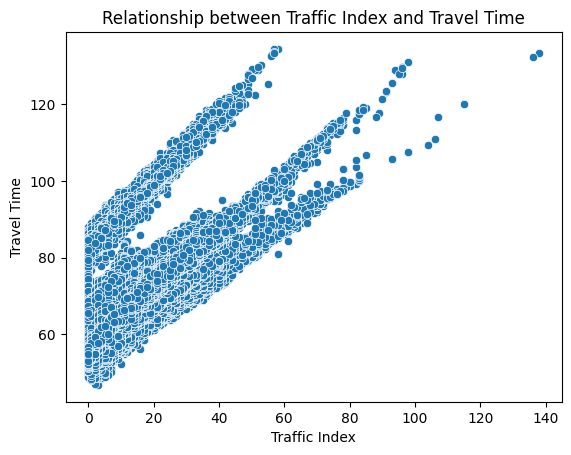

In [19]:
np.corrcoef(df['TrafficIndexLive'], df['TravelTimeLive'])

sns.scatterplot(x='TrafficIndexLive', y='TravelTimeLive', data=df)
plt.title('Relationship between Traffic Index and Travel Time')
plt.xlabel('Traffic Index')
plt.ylabel('Travel Time')
plt.show()


## 2. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


Text(0.5, 1.0, 'Average Traffic Index by Hour')

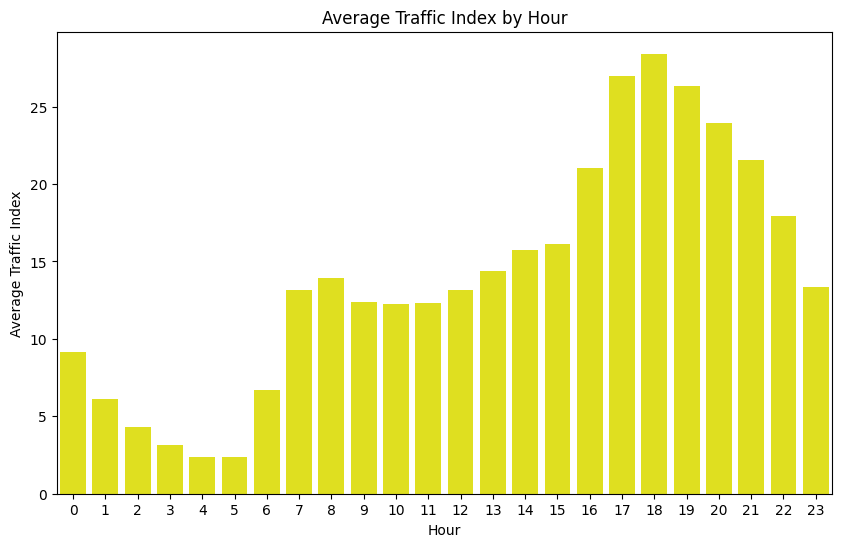

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x=hour.index, y='TrafficIndexLive', data=hour, color='yellow')
plt.xticks(range(24))
plt.xlabel('Hour')
plt.ylabel('Average Traffic Index')
plt.title('Average Traffic Index by Hour')

### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

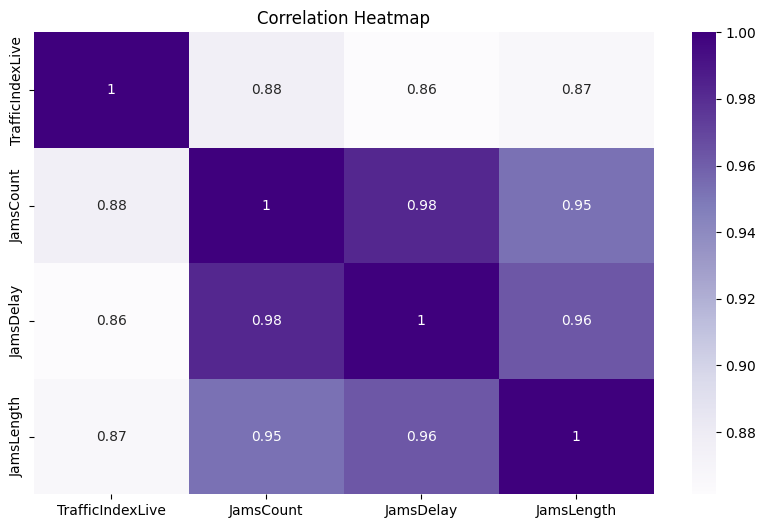

In [27]:
from matplotlib import colormaps
list(colormaps)
correlation_matrix = df[['TrafficIndexLive', 'JamsCount', 'JamsDelay', 'JamsLength']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples')
plt.title('Correlation Heatmap')
plt.show()

## 3. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>

first as we can see lastely about the correlation heatmap we notice that
there is a stronglu corrrelated postive relationship between Traffic index live and jams count, jamsDelay and jamsLength.

understanding the correlation between traffic metrics can help in developing  predective models.

second the distrbution of traffic index is looks like skewed right histogram so In this case, the mode is the highest point of the histogram, whereas the mean is greater then the median.

thirdly in the visual of 'Average Traffic Index by Hour ' it's looks like that in the hour of (18) that show us the highest of Average Traffic Index.
